0.8441760751909132 0.827632296845849
0.9869917653887604 0.9826429968844056
0.9915916924759527 0.9887117184658405
0.9643484946613208 0.9589261988822837


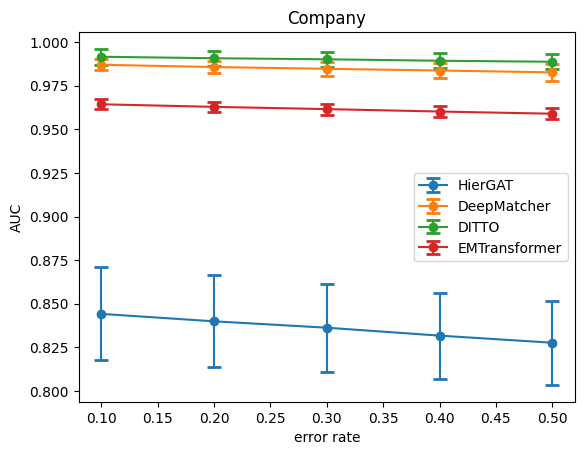

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


for name in ['HierGAT_company','DeepMatcher_company','DITTO_company','EMTransformer_company']:

    AUC = []
    for frac in [0.1, 0.2, 0.3, 0.4, 0.5]:#, 0.6, 0.7, 0.8, 0.9, 1]:
        frac = str(int(frac*100))
        if len(frac) == 1: frac = frac +'0'
        AUC.append([])
        
        FOLD = [1,2,3,4,5]
        # if name == 'EMTransformer_company': FOLD = [1,2,3,4,5]
        # if name == 'DITTO_company': FOLD = [1,2,3,4,5]
        for fold in FOLD:
            for rep in range(1,11):
                if name == 'DeepMatcher_company':
                    tmp = 'DM'
                elif name == 'HierMatcher':
                    tmp = '2HierMatcher'
                elif name == 'HierGAT':
                    tmp = 'HGAT'
                elif name == 'EMTransformer_company':
                    tmp = 'EM'
                elif name == 'DITTO_company':
                    tmp = 'DITTO'
                elif name == 'ZeroER':
                    tmp = 'ZER'
                else:
                    tmp = 'HG'
                
            
                if name in ['HierMatcher','HierGAT']:
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy_folded_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name  == 'ZeroER':
                    base = '/Users/mohammad/Downloads/zeroer-main/RES_folded/ZeroER/'
                    try:
                        df = pd.read_csv(base+ tmp+'_score_abt_buy_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                    except: pass
                else:
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_company__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                y_true = df[df.columns[0]]
                y_score = df[df.columns[1]]
                if name in ['DeepMatcher_company','DITTO_company','EMTransformer_company']:
                    y_true = df[df.columns[1]]
                    y_score = df[df.columns[0]]

                auc_ = roc_auc_score(y_true, y_score)
                AUC[-1].append(auc_)


    AUC = np.array(AUC)

    print(np.max(np.mean(AUC, axis=1)), np.min(np.mean(AUC, axis=1)))
    

    FRAC = [0.1, 0.2, 0.3, 0.4, 0.5]#, 0.6, 0.7, 0.8, 0.9, 1]
    plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**0.5, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('_company',''))
    plt.xlabel('error rate')
    plt.ylabel('AUC')
    # if name != 'HierGAT':
        # plt.ylim([0.855,0.895])
    # plt.savefig(name+'_abt_buy.pdf')
    # plt.show()

plt.title('Company')
plt.legend()
# plt.savefig('abt_buy.pdf')
plt.show()

0.8826086968718739 0.8664533168166265

0.8844617470083119 0.8737157331083287
0.9827012017033623 0.9709689280144141

0.9856952480035102 0.9801400100320081
0.9810025219816582 0.9689882351027517

0.9826205360316267 0.9701859075395164
0.9824809647569067 0.9667224501706196

0.9879426122132082 0.9804738720020558
0.9116338432680667 0.873531471305584

0.9152140570723823 0.8941851625888811


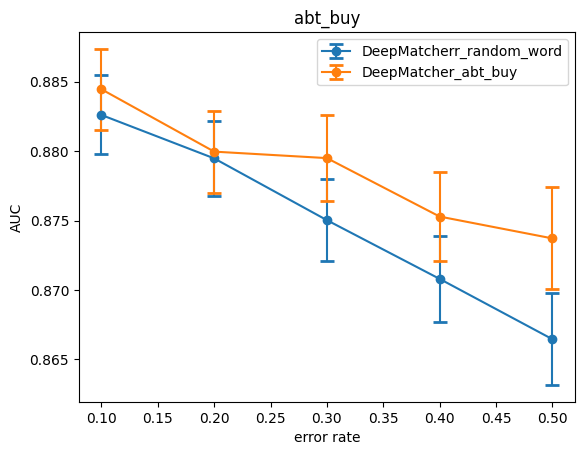

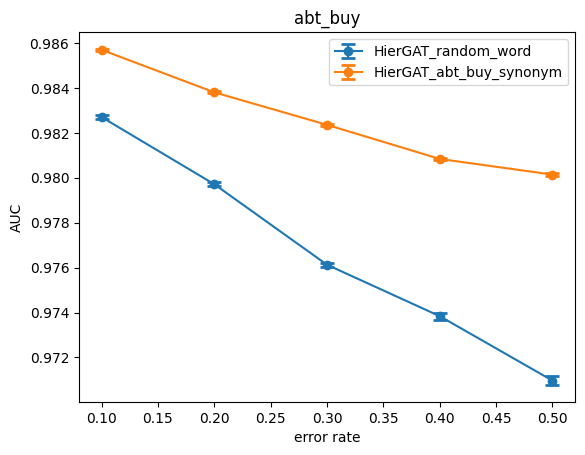

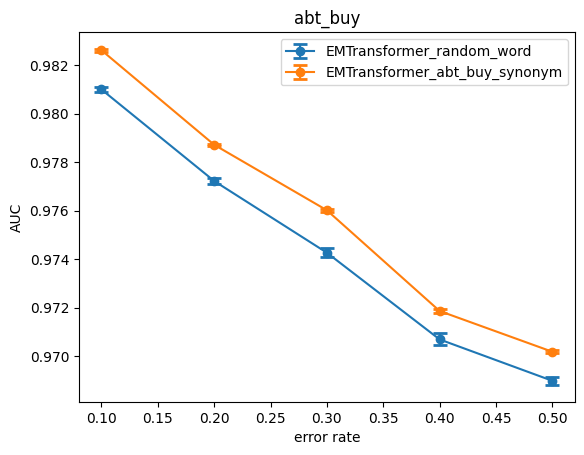

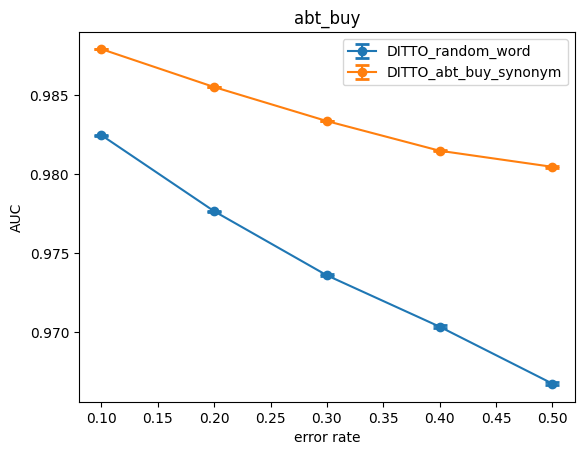

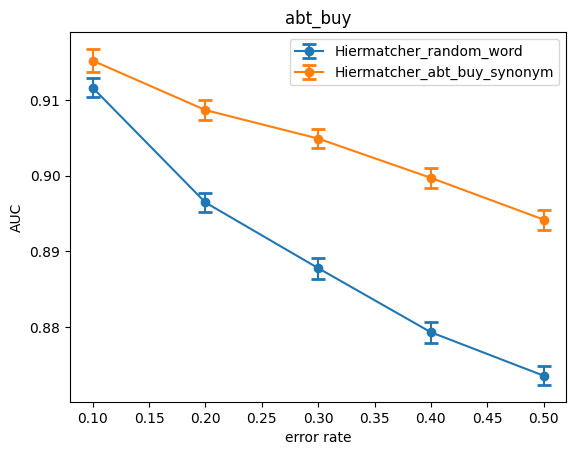

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# for jj,name in enumerate(['Hiermatcher_abt_buy']):
for jj,name in enumerate(['DeepMatcher_abt_buy_random_noise','DeepMatcher_abt_buy','HierGAT_abt_buy_random_noise','HierGAT_abt_buy','EMTransformer_abt_buy_random_noise','EMTransformer_abt_buy','DITTO_abt_buy_random_noise','DITTO_abt_buy','Hiermatcher_abt_buy_random_noise','Hiermatcher_abt_buy']):

    AUC = []
    for frac in [0.1, 0.2, 0.3, 0.4, 0.5]:#, 0.6, 0.7, 0.8, 0.9, 1]:
        frac = str(int(frac*100))
        if len(frac) == 1: frac = frac +'0'
        AUC.append([])
        
        FOLD = [1,2,3,4,5]
        # if name in ['Hiermatcher' ,'Hiermatcher_abt_buy_random_noise']: FOLD = [1]
        # if name in ['EMTransformer','EMTransformer_abt_buy_random_noise']: FOLD = [1,2,3,4]
        # if 'DITTO' in name: FOLD = [1,2,3,4]
        for fold in FOLD:
            for rep in range(1,11):
                if name in ['DeepMatcher_abt_buy_random_noise','DeepMatcher_abt_buy']:
                    tmp = 'DM'
                elif name == 'Hiermatcher_abt_buy':
                    tmp = 'HM'
                elif name in ['HierGAT_abt_buy']:
                    tmp = 'HG'
                elif name == 'HierGAT_abt_buy_random_noise':
                    tmp = 'HG'
                elif name in ['EMTransformer_company','EMTransformer_abt_buy_random_noise']:
                    tmp = 'EM'
                elif name in ['DITTO_company','DITTO_abt_buy_random_noise','DITTO_abt_buy']:
                    tmp = 'DITTO'
                elif name == 'ZeroER':
                    tmp = 'ZER'
                elif name =='EMTransformer_abt_buy': 
                    tmp = 'EM'
                elif name in ['Hiermatcher_abt_buy_random_noise']:
                    tmp = 'HM'
                else:
                    tmp = 'UNKNOW'
                
            
                if name in ['HierGAT_abt_buy']:
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name  == 'ZeroER':
                    base = '/Users/mohammad/Downloads/zeroer-main/RES_folded/ZeroER/'
                    try:
                        df = pd.read_csv(base+ tmp+'_score_abt_buy_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                    except: pass
                elif name == 'DeepMatcher_abt_buy':
                    df = pd.read_csv('out_score/DeepMatcher_abt_buy/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name =='HierGAT_abt_buy_random_noise':
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')

                elif name == 'EMTransformer_abt_buy':
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name == 'DITTO_abt_buy':
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name =='Hiermatcher_abt_buy':
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                # elif name == 'Hiermatcher_abt_buy_random_noise':
                #     df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                else:
                    df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                y_true = df[df.columns[0]]
                y_score = df[df.columns[1]]
                if name in ['DeepMatcher_abt_buy_random_noise','DITTO_company','EMTransformer_company','DeepMatcher_abt_buy','HierGAT_abt_buy','EMTransformer_abt_buy_random_noise','EMTransformer_abt_buy','DITTO_abt_buy_random_noise','DITTO_abt_buy','Hiermatcher_abt_buy_random_noise','Hiermatcher_abt_buy']:
                    y_true = df[df.columns[1]]
                    y_score = df[df.columns[0]]

                auc_ = roc_auc_score(y_true, y_score)
                AUC[-1].append(auc_)


    AUC = np.array(AUC)

    print(np.max(np.mean(AUC, axis=1)), np.min(np.mean(AUC, axis=1)))
    

    FRAC = [0.1, 0.2, 0.3, 0.4, 0.5]#, 0.6, 0.7, 0.8, 0.9, 1]
    if name == 'HierGAT_abt_buy': name = name + '_synonym'
    if name == 'EMTransformer_abt_buy': name = name + '_synonym'
    if name == 'DITTO_abt_buy': name = name + '_synonym'
    if name == 'Hiermatcher_abt_buy': name = name + '_synonym'

    if jj %2 ==0 : 
        plt.figure()
        print()

    if name == 'DeepMatcher_abt_buy_random_noise':
        plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('_abt_buy_random_noise','r_random_word'))
    else:
        plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('_abt_buy_random_noise','_random_word'))

    plt.xlabel('error rate')
    plt.ylabel('AUC')
    plt.title('abt_buy')
    # if name != 'HierGAT':
        # plt.ylim([0.855,0.895])
    # plt.savefig(name+'_abt_buy.pdf')
    # plt.show()
    plt.legend()
    


plt.legend()
# plt.savefig('abt_buy.pdf')
plt.show()



0.9909209703266822 0.9908298863729315

HierGAT_WDC_random_noise


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_6586/4210105224.py:138: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=marker_tmp,markerfacecolor=darken_colors(col_tmp),color=darken_colors(col_tmp),


0.9909719624958595 0.9908721251076011
HierGAT_WDC


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_6586/4210105224.py:171: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=style_dict[name.replace('_random_noise','').replace('_WDC','')]['marker'],markerfacecolor=style_dict[name.replace('_random_noise','').replace('_WDC','')]['color'],color=style_dict[name.replace('_random_noise','').replace('_WDC','')]['color'],


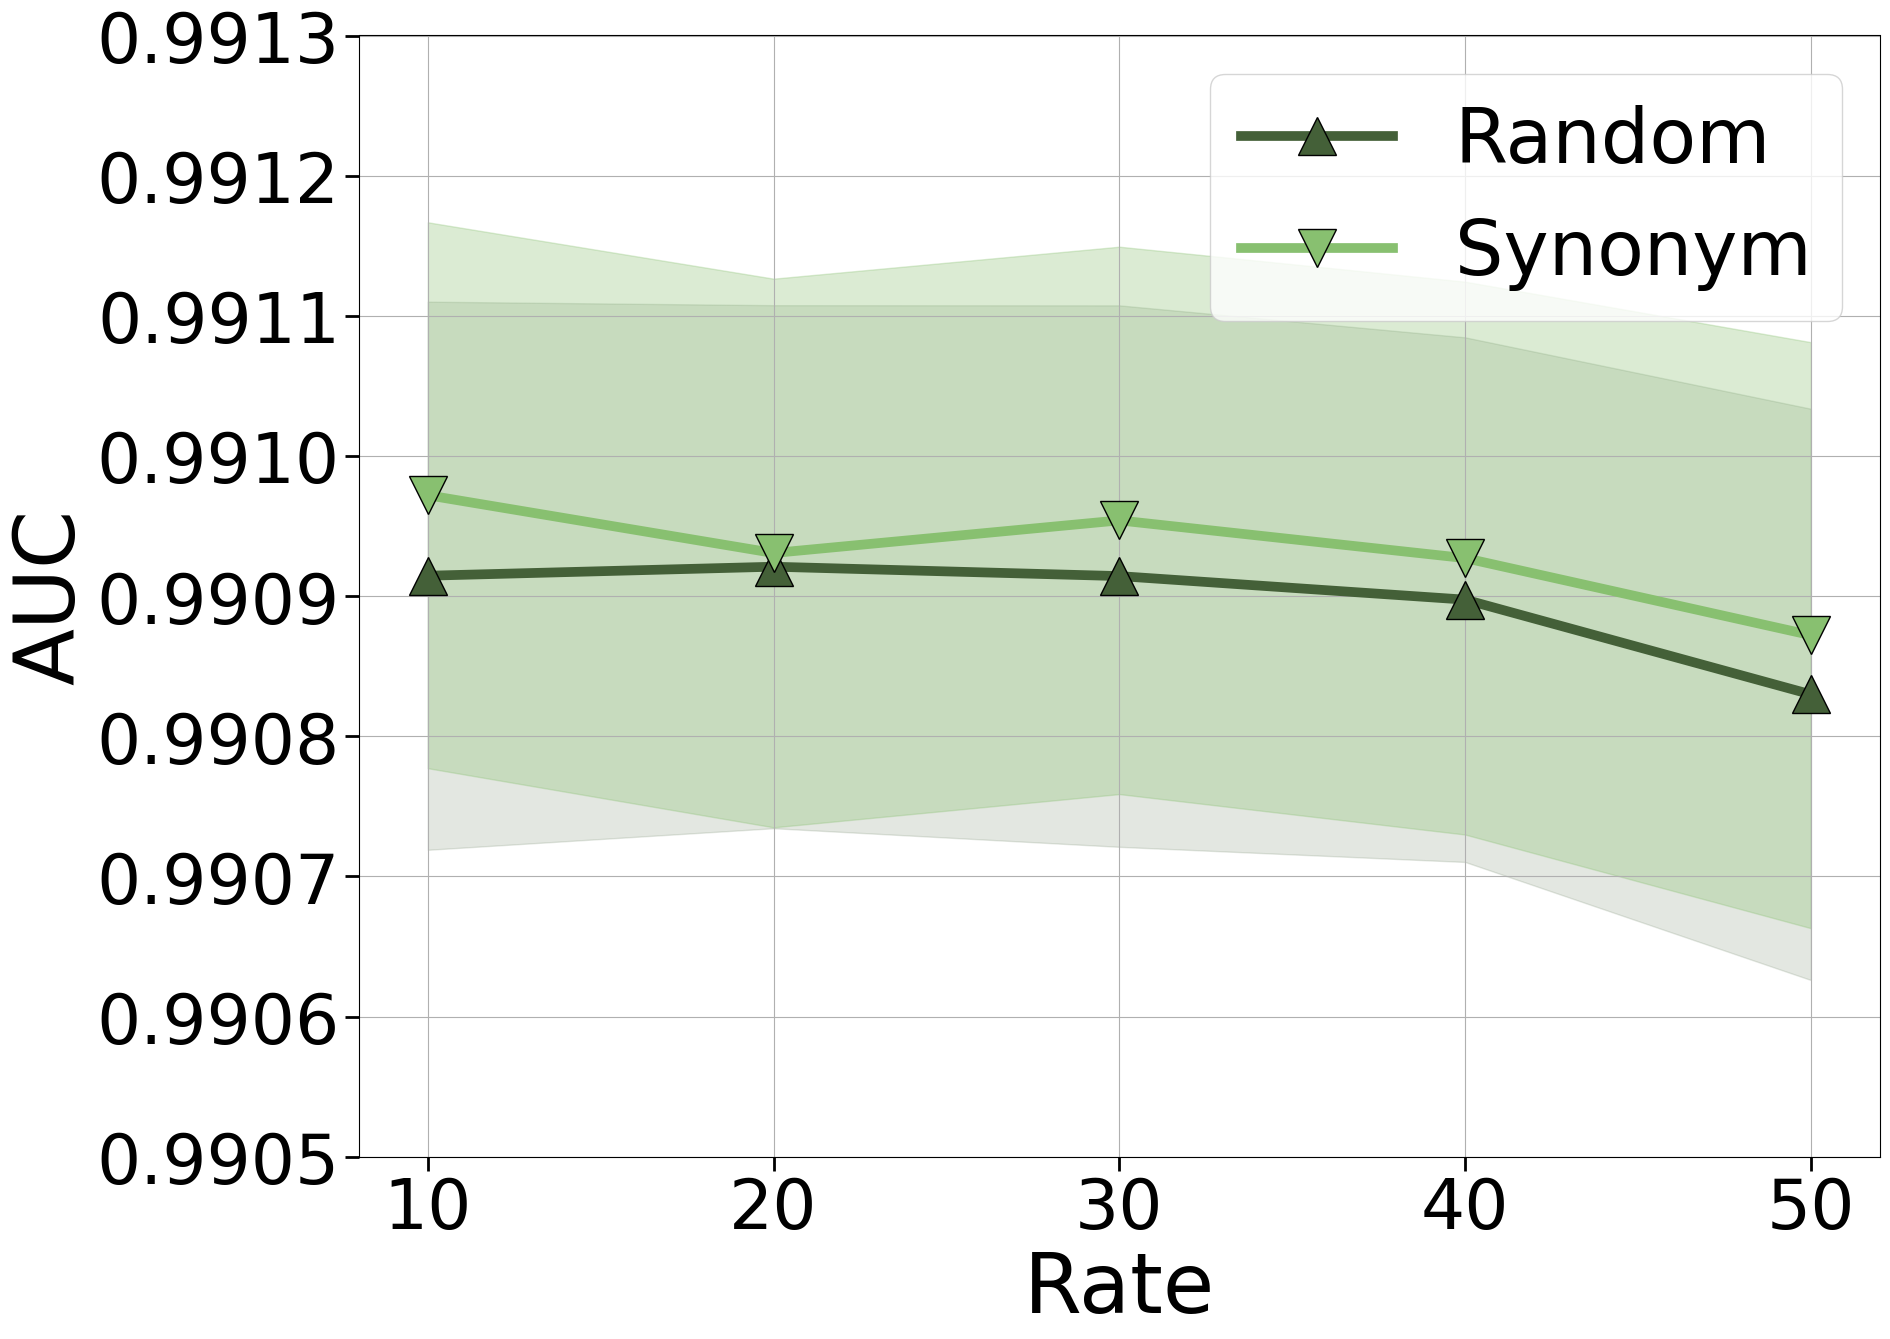

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# for jj,name in enumerate(['Hiermatcher_WDC']):

# for jj,name in enumerate(['DeepMatcher_WDC_random_noise','DeepMatcher_WDC']):#,'EMTransformer_WDC_random_noise','EMTransformer_WDC','DITTO_WDC_random_noise','DITTO_WDC','HierGAT_WDC_random_noise','HierGAT_WDC']):
for jj,name in enumerate(['HierGAT_WDC_random_noise','HierGAT_WDC']):#,'DITTO_WDC_random_noise','DITTO_WDC','HierGAT_WDC_random_noise','HierGAT_WDC']):

    AUC = []
    for frac in [0.1, 0.2, 0.3, 0.4, 0.5]:#, 0.6, 0.7, 0.8, 0.9, 1]:
        frac = str(int(frac*100))
        if len(frac) == 1: frac = frac +'0'
        AUC.append([])
        
        FOLD = [1,2,3,4,5]
        # if name in ['Hiermatcher' ,'Hiermatcher_WDC_random_noise']: FOLD = [1]
        # if name in ['EMTransformer','EMTransformer_WDC_random_noise']: FOLD = [1,2,3,4]
        # if 'DITTO' in name: FOLD = [1,2,3,4]
        for fold in FOLD:
            for rep in range(1,11):
                if name in ['DeepMatcher_WDC_random_noise','DeepMatcher_WDC']:
                    tmp = 'DM'
                elif name == 'Hiermatcher_WDC':
                    tmp = 'HM'
                elif name in ['HierGAT_WDC']:
                    tmp = 'HG'
                elif name == 'HierGAT_WDC_random_noise':
                    tmp = 'HG'
                elif name in ['EMTransformer_WDC_random_noise']:
                    tmp = 'EM'
                elif name in ['DITTO_company','DITTO_WDC_random_noise','DITTO_WDC']:
                    tmp = 'DITTO'
                elif name == 'ZeroER':
                    tmp = 'ZER'
                elif name =='EMTransformer_WDC': 
                    tmp = 'EM'
                elif name in ['Hiermatcher_WDC_random_noise']:
                    tmp = 'HM'
                else:
                    tmp = 'UNKNOW'
                
            
                if name in ['HierGAT_WDC']:
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name  == 'ZeroER':
                    base = '/Users/mohammad/Downloads/zeroer-main/RES_folded/ZeroER/'
                    try:
                        df = pd.read_csv(base+ tmp+'_score_WDC_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                    except: pass
                elif name == 'DeepMatcher_WDC':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/DeepMatcher_WDC/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name =='HierGAT_WDC_random_noise':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')

                elif name == 'EMTransformer_WDC':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name == 'DITTO_WDC':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name =='Hiermatcher_WDC':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                # elif name == 'Hiermatcher_WDC_random_noise':
                #     df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_WDC_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                else:
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_WDC__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                y_true = df[df.columns[0]]
                y_score = df[df.columns[1]]
                if name in ['DeepMatcher_WDC_random_noise','DITTO_company','EMTransformer_company','DeepMatcher_WDC','EMTransformer_WDC_random_noise','EMTransformer_WDC','DITTO_WDC_random_noise','DITTO_WDC','Hiermatcher_WDC_random_noise','Hiermatcher_WDC']:
                    y_true = df[df.columns[1]]
                    y_score = df[df.columns[0]]

                auc_ = roc_auc_score(y_true, y_score)
                AUC[-1].append(auc_)


    AUC = np.array(AUC)

    print(np.max(np.mean(AUC, axis=1)), np.min(np.mean(AUC, axis=1)))
    style_dict = {
        # 'Hiermatcher': {'color': '#377eb8', 'marker': '^'},
        'DeepMatcher': {'color': '#F4D35E', 'marker': 'o'},
        'DITTO': {'color': '#E07A5F', 'marker': '*'},
        'EMTransformer': {'color': '#5DADEC', 'marker': 's'},
        'HierGAT': {'color': '#88C070', 'marker': 'v'}
    }


    import matplotlib.colors as mcolors

    def darken_colors(color_dict, factor=0.5):
        color = color_dict
        rgb = mcolors.to_rgb(color)  # Convert to RGB tuple
        darkened_rgb = tuple(max(0, c * factor) for c in rgb)  # Darken each channel
        darkened_color = mcolors.to_hex(darkened_rgb)  # Convert back to hex
        return darkened_color





    FRAC = [0.1, 0.2, 0.3, 0.4, 0.5]#, 0.6, 0.7, 0.8, 0.9, 1]
    # if name == 'HierGAT_WDC': name = name + '_synonym'
    # if name == 'DeepMatcher_WDC': name = name + '_synonym'
    # if name == 'EMTransformer_WDC': name = name + '_synonym'
    # if name == 'DITTO_WDC': name = name + '_synonym'
    # if name == 'Hiermatcher_WDC': name = name + '_synonym'

    if jj %2 ==0 : 
        plt.figure(figsize=(19, 13.5))
        print()

    if 'random_noise' in name :
        # plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('WDC','').replace('_random_noise',' Random noise').replace('DeepMatcher_',''))


        name_to_abbreviation = {
            # 'Hiermatcher': 'HM',
            'DeepMatcher': 'DM',
            'DITTO': 'DITTO',
            'EMTransformer': 'EM',
            'HierGAT': 'HG'
        }   
        col_tmp = style_dict[name.replace('_random_noise','').replace('_WDC','')]['color']
        marker_tmp = style_dict[name.replace('_random_noise','').replace('_WDC','')]['marker']
        if marker_tmp == 'o': marker_tmp = 's'
        elif marker_tmp == '*': marker_tmp = 'X'
        elif marker_tmp == 's': marker_tmp = 'D'
        elif marker_tmp == 'v': marker_tmp = '^'
        print(name)
        plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=marker_tmp,markerfacecolor=darken_colors(col_tmp),color=darken_colors(col_tmp),
                 
                 
                 markeredgecolor='black',
                    markersize=27, linewidth=7, 
                    label='Random')
        
                #  markeredgecolor=style_dict[name.replace(task,'')]['color'])
        # plt.fill_between(frac_float, 
        #                 mean_auc - np.sqrt(np.var(AUC, axis=1)),
        #                 mean_auc + np.sqrt(np.var(AUC, axis=1)),
        #                 color='b', alpha=0.2,
        #                 label='±1 Standard Deviation')
        from scipy import stats
        # Calculate confidence interval
        confidence_interval = 0.5
        z_score = stats.norm.ppf((1 + confidence_interval) / 2)
        margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / (5))

        # Plot confidence intervals
        plt.fill_between(FRAC,
                        np.mean(AUC, axis=1) - margin_of_error,
                        np.mean(AUC, axis=1) + margin_of_error,
                        alpha=0.15,color=darken_colors(col_tmp))
                        # label=f'{confidence_interval*100}% Confidence Interval')




    else:
        print(name)

        # plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('WDC','').replace('_random_noise',' Synonym noise').replace('DeepMatcher_','')+' Synonym noise')
        plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=style_dict[name.replace('_random_noise','').replace('_WDC','')]['marker'],markerfacecolor=style_dict[name.replace('_random_noise','').replace('_WDC','')]['color'],color=style_dict[name.replace('_random_noise','').replace('_WDC','')]['color'],
                 markeredgecolor='black',
                    markersize=27, linewidth=7, 
                    label='Synonym')
        
                #  markeredgecolor=style_dict[name.replace(task,'')]['color'])
        # plt.fill_between(frac_float, 
        #                 mean_auc - np.sqrt(np.var(AUC, axis=1)),
        #                 mean_auc + np.sqrt(np.var(AUC, axis=1)),
        #                 color='b', alpha=0.2,
        #                 label='±1 Standard Deviation')
        from scipy import stats
        # Calculate confidence interval
        confidence_interval = 0.5
        z_score = stats.norm.ppf((1 + confidence_interval) / 2)
        margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / (5))

        # Plot confidence intervals
        plt.fill_between(FRAC,
                        np.mean(AUC, axis=1) - margin_of_error,
                        np.mean(AUC, axis=1) + margin_of_error,
                        alpha=0.3,color=style_dict[name.replace('_random_noise','').replace('_WDC','')]['color'])
                        # label=f'{confidence_interval*100}% Confidence Interval')










    plt.xlabel('error rate')
    plt.ylabel('AUC')
    # plt.title('WDC')
    plt.legend(fontsize=55)

    # if name != 'HierGAT':
        # plt.ylim([0.855,0.895])
    # plt.savefig(name+'_WDC.pdf')
    # plt.show()
    plt.legend()
    
plt.grid()


from matplotlib.ticker import FuncFormatter

def format_y(value, tick_number): return f'{value:.4f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
# plt.legend(fontsize=40, ncol=2)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=1)

plt.xlabel('Rate', fontsize=60)
plt.ylabel('AUC', fontsize=60)
plt.yticks(fontsize=50)
plt.xticks([0.1, .2, .3, .40, .50, ], [10, 20, 30, 40, 50], fontsize=50)

# plt.legend()
plt.legend(fontsize=55)
plt.ylim([0.9905,0.9913])
plt.tight_layout()

plt.savefig('WDC_gat.pdf')
# plt.close()



0.9810025219816582 0.9689882351027517

EMTransformer_abt_buy_random_noise


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_6586/3184835422.py:138: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=marker_tmp,markerfacecolor=darken_colors(col_tmp),color=darken_colors(col_tmp),


0.9826205360316267 0.9701859075395164
EMTransformer_abt_buy


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_6586/3184835422.py:171: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['marker'],markerfacecolor=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['color'],color=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['color'],


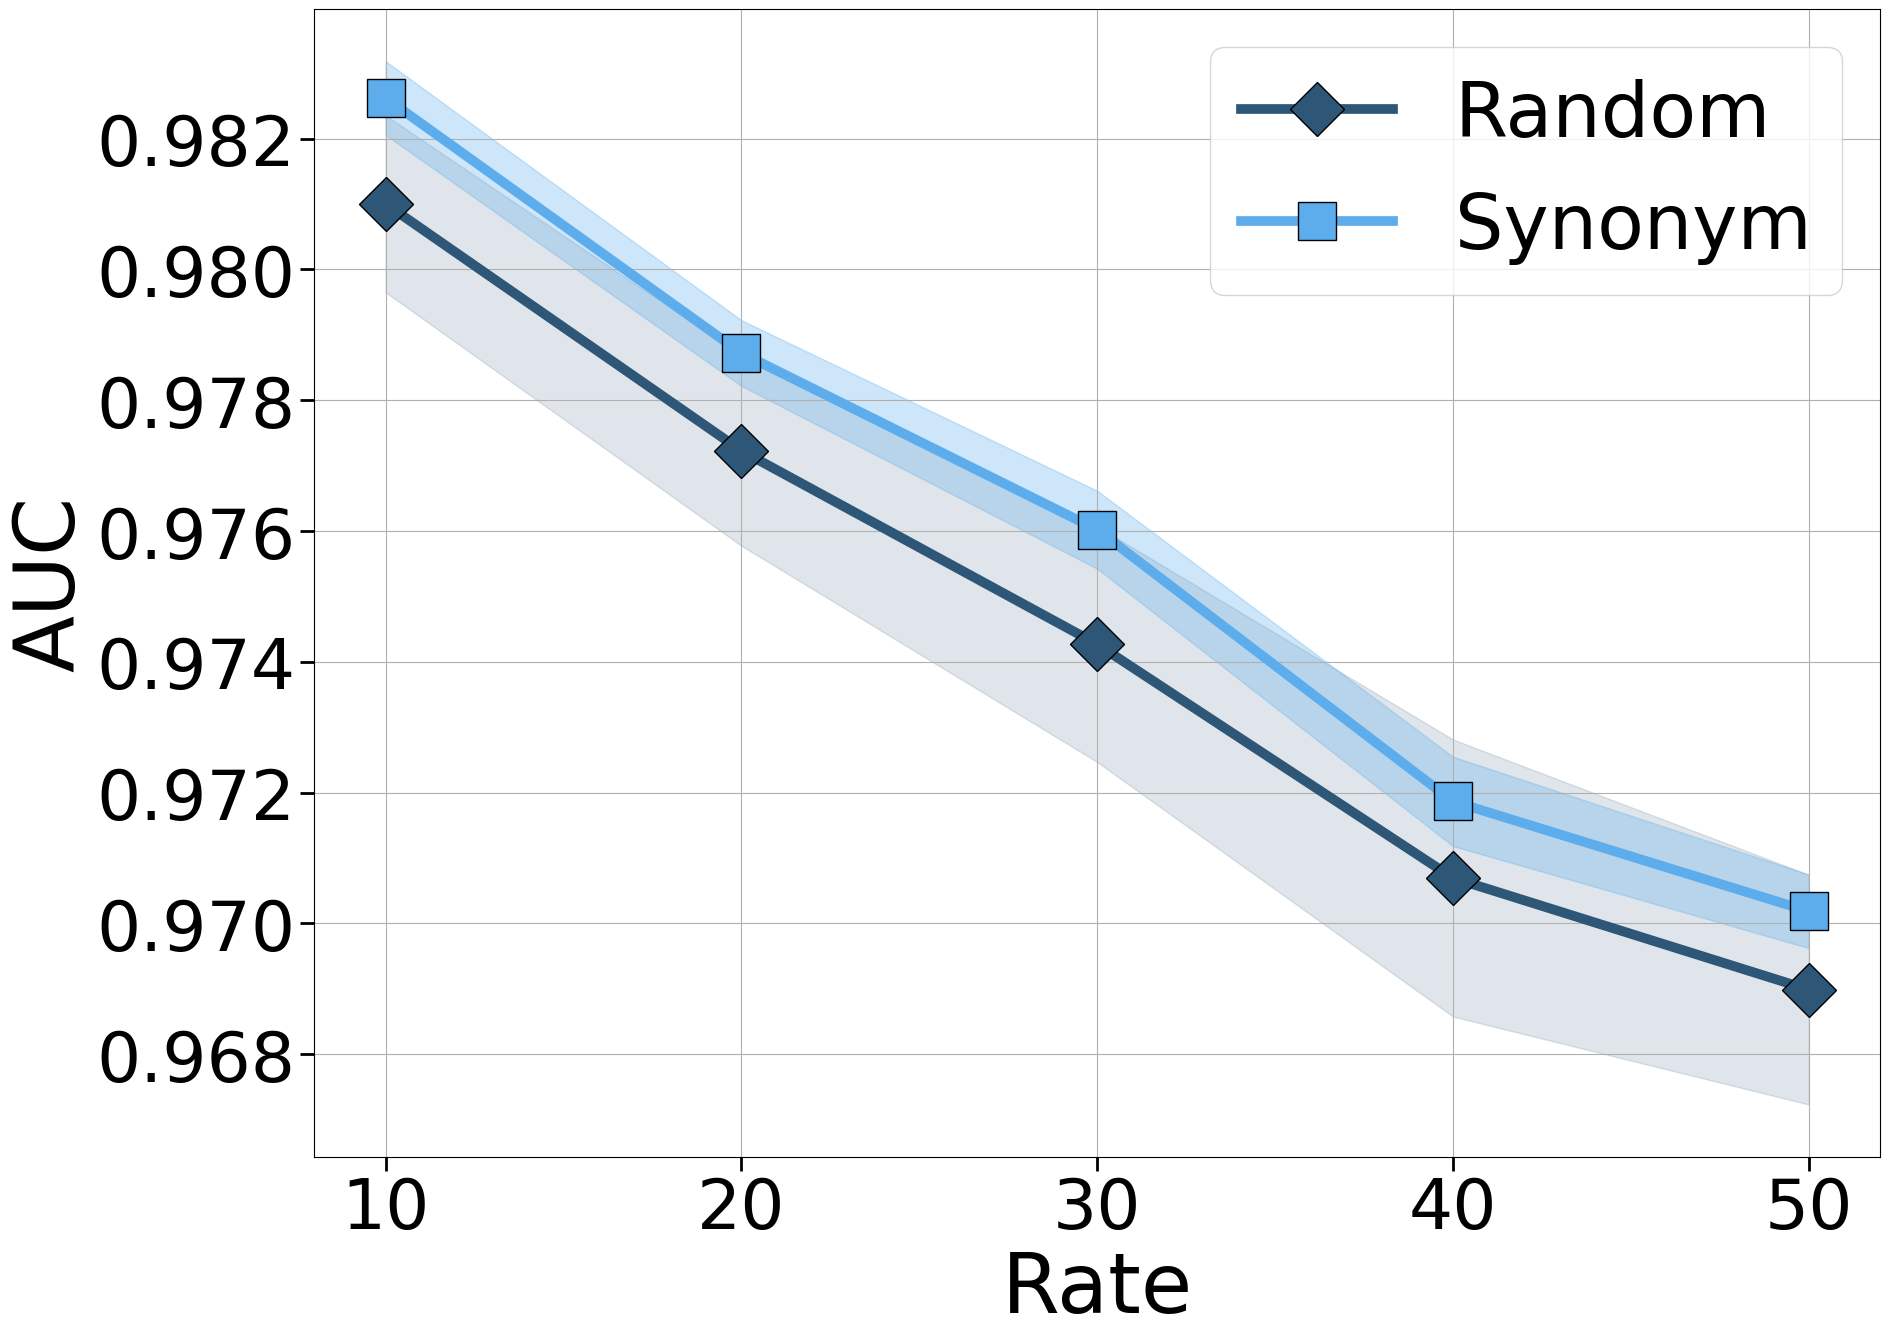

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# for jj,name in enumerate(['Hiermatcher_abt_buy']):

# for jj,name in enumerate(['DeepMatcher_abt_buy_random_noise','DeepMatcher_abt_buy']):#,'EMTransformer_abt_buy_random_noise','EMTransformer_abt_buy','DITTO_abt_buy_random_noise','DITTO_abt_buy','HierGAT_abt_buy_random_noise','HierGAT_abt_buy']):
for jj,name in enumerate(['EMTransformer_abt_buy_random_noise','EMTransformer_abt_buy']):#,'DITTO_abt_buy_random_noise','DITTO_abt_buy','HierGAT_abt_buy_random_noise','HierGAT_abt_buy']):

    AUC = []
    for frac in [0.1, 0.2, 0.3, 0.4, 0.5]:#, 0.6, 0.7, 0.8, 0.9, 1]:
        frac = str(int(frac*100))
        if len(frac) == 1: frac = frac +'0'
        AUC.append([])
        
        FOLD = [1,2,3,4,5]
        # if name in ['Hiermatcher' ,'Hiermatcher_abt_buy_random_noise']: FOLD = [1]
        # if name in ['EMTransformer','EMTransformer_abt_buy_random_noise']: FOLD = [1,2,3,4]
        # if 'DITTO' in name: FOLD = [1,2,3,4]
        for fold in FOLD:
            for rep in range(1,11):
                if name in ['DeepMatcher_abt_buy_random_noise','DeepMatcher_abt_buy']:
                    tmp = 'DM'
                elif name == 'Hiermatcher_abt_buy':
                    tmp = 'HM'
                elif name in ['HierGAT_abt_buy']:
                    tmp = 'HG'
                elif name == 'HierGAT_abt_buy_random_noise':
                    tmp = 'HG'
                elif name in ['EMTransformer_abt_buy_random_noise']:
                    tmp = 'EM'
                elif name in ['DITTO_company','DITTO_abt_buy_random_noise','DITTO_abt_buy']:
                    tmp = 'DITTO'
                elif name == 'ZeroER':
                    tmp = 'ZER'
                elif name =='EMTransformer_abt_buy': 
                    tmp = 'EM'
                elif name in ['Hiermatcher_abt_buy_random_noise']:
                    tmp = 'HM'
                else:
                    tmp = 'UNKNOW'
                
            
                if name in ['HierGAT_abt_buy']:
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name  == 'ZeroER':
                    base = '/Users/mohammad/Downloads/zeroer-main/RES_folded/ZeroER/'
                    try:
                        df = pd.read_csv(base+ tmp+'_score_abt_buy_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                    except: pass
                elif name == 'DeepMatcher_abt_buy':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/DeepMatcher_abt_buy/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name =='HierGAT_abt_buy_random_noise':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')

                elif name == 'EMTransformer_abt_buy':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name == 'DITTO_abt_buy':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                elif name =='Hiermatcher_abt_buy':
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                # elif name == 'Hiermatcher_abt_buy_random_noise':
                #     df = pd.read_csv('out_score/'+name+'/'+tmp+'_score_abt_buy_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                else:
                    df = pd.read_csv('/Users/mohammad/Desktop/EM_Heterogeneity/out_score/'+name+'/'+tmp+'_score_abt_buy__'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')


                y_true = df[df.columns[0]]
                y_score = df[df.columns[1]]
                if name in ['DeepMatcher_abt_buy_random_noise','DITTO_company','EMTransformer_company','DeepMatcher_abt_buy','EMTransformer_abt_buy_random_noise','EMTransformer_abt_buy','DITTO_abt_buy_random_noise','DITTO_abt_buy','HierGAT_abt_buy']:
                    y_true = df[df.columns[1]]
                    y_score = df[df.columns[0]]

                auc_ = roc_auc_score(y_true, y_score)
                AUC[-1].append(auc_)


    AUC = np.array(AUC)

    print(np.max(np.mean(AUC, axis=1)), np.min(np.mean(AUC, axis=1)))
    style_dict = {
        # 'Hiermatcher': {'color': '#377eb8', 'marker': '^'},
        'DeepMatcher': {'color': '#F4D35E', 'marker': 'o'},
        'DITTO': {'color': '#E07A5F', 'marker': '*'},
        'EMTransformer': {'color': '#5DADEC', 'marker': 's'},
        'HierGAT': {'color': '#88C070', 'marker': 'v'}
    }


    import matplotlib.colors as mcolors

    def darken_colors(color_dict, factor=0.5):
        color = color_dict
        rgb = mcolors.to_rgb(color)  # Convert to RGB tuple
        darkened_rgb = tuple(max(0, c * factor) for c in rgb)  # Darken each channel
        darkened_color = mcolors.to_hex(darkened_rgb)  # Convert back to hex
        return darkened_color





    FRAC = [0.1, 0.2, 0.3, 0.4, 0.5]#, 0.6, 0.7, 0.8, 0.9, 1]
    # if name == 'HierGAT_abt_buy': name = name + '_synonym'
    # if name == 'DeepMatcher_abt_buy': name = name + '_synonym'
    # if name == 'EMTransformer_abt_buy': name = name + '_synonym'
    # if name == 'DITTO_abt_buy': name = name + '_synonym'
    # if name == 'Hiermatcher_abt_buy': name = name + '_synonym'

    if jj %2 ==0 : 
        plt.figure(figsize=(19, 13.5))
        print()

    if 'random_noise' in name :
        # plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('abt_buy','').replace('_random_noise',' Random noise').replace('DeepMatcher_',''))


        name_to_abbreviation = {
            # 'Hiermatcher': 'HM',
            'DeepMatcher': 'DM',
            'DITTO': 'DITTO',
            'EMTransformer': 'EM',
            'HierGAT': 'HG'
        }   
        col_tmp = style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['color']
        marker_tmp = style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['marker']
        if marker_tmp == 'o': marker_tmp = 's'
        elif marker_tmp == '*': marker_tmp = 'X'
        elif marker_tmp == 's': marker_tmp = 'D'
        elif marker_tmp == 'v': marker_tmp = '^'
        print(name)
        plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=marker_tmp,markerfacecolor=darken_colors(col_tmp),color=darken_colors(col_tmp),
                 
                 
                 markeredgecolor='black',
                    markersize=27, linewidth=7, 
                    label='Random')
        
                #  markeredgecolor=style_dict[name.replace(task,'')]['color'])
        # plt.fill_between(frac_float, 
        #                 mean_auc - np.sqrt(np.var(AUC, axis=1)),
        #                 mean_auc + np.sqrt(np.var(AUC, axis=1)),
        #                 color='b', alpha=0.2,
        #                 label='±1 Standard Deviation')
        from scipy import stats
        # Calculate confidence interval
        confidence_interval = 0.5
        z_score = stats.norm.ppf((1 + confidence_interval) / 2)
        margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / (5))

        # Plot confidence intervals
        plt.fill_between(FRAC,
                        np.mean(AUC, axis=1) - margin_of_error,
                        np.mean(AUC, axis=1) + margin_of_error,
                        alpha=0.15,color=darken_colors(col_tmp))
                        # label=f'{confidence_interval*100}% Confidence Interval')




    else:
        print(name)

        # plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2','').replace('abt_buy','').replace('_random_noise',' Synonym noise').replace('DeepMatcher_','')+' Synonym noise')
        plt.plot(FRAC, np.mean(AUC, axis=1), 'b-',marker=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['marker'],markerfacecolor=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['color'],color=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['color'],
                 markeredgecolor='black',
                    markersize=27, linewidth=7, 
                    label='Synonym')
        
                #  markeredgecolor=style_dict[name.replace(task,'')]['color'])
        # plt.fill_between(frac_float, 
        #                 mean_auc - np.sqrt(np.var(AUC, axis=1)),
        #                 mean_auc + np.sqrt(np.var(AUC, axis=1)),
        #                 color='b', alpha=0.2,
        #                 label='±1 Standard Deviation')
        from scipy import stats
        # Calculate confidence interval
        confidence_interval = 0.3
        z_score = stats.norm.ppf((1 + confidence_interval) / 2)
        margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / (5))

        # Plot confidence intervals
        plt.fill_between(FRAC,
                        np.mean(AUC, axis=1) - margin_of_error,
                        np.mean(AUC, axis=1) + margin_of_error,
                        alpha=0.3,color=style_dict[name.replace('_random_noise','').replace('_abt_buy','')]['color'])
                        # label=f'{confidence_interval*100}% Confidence Interval')










    plt.xlabel('error rate')
    plt.ylabel('AUC')
    # plt.title('abt_buy')
    plt.legend(fontsize=55)

    # if name != 'HierGAT':
        # plt.ylim([0.855,0.895])
    # plt.savefig(name+'_abt_buy.pdf')
    # plt.show()
    plt.legend()
    
plt.grid()


from matplotlib.ticker import FuncFormatter

def format_y(value, tick_number): return f'{value:.3f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
# plt.legend(fontsize=40, ncol=2)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=1)

plt.xlabel('Rate', fontsize=60)
plt.ylabel('AUC', fontsize=60)
plt.yticks(fontsize=50)
plt.xticks([0.1, .2, .3, .40, .50, ], [10, 20, 30, 40, 50], fontsize=50)

# plt.legend()
plt.legend(fontsize=55)

plt.tight_layout()

plt.savefig('abt_buy_emt.pdf')
# plt.close()


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_5361/2614054844.py:108: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_5361/2614054844.py:108: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_5361/2614054844.py:108: UserWarning: color is redundantly defined

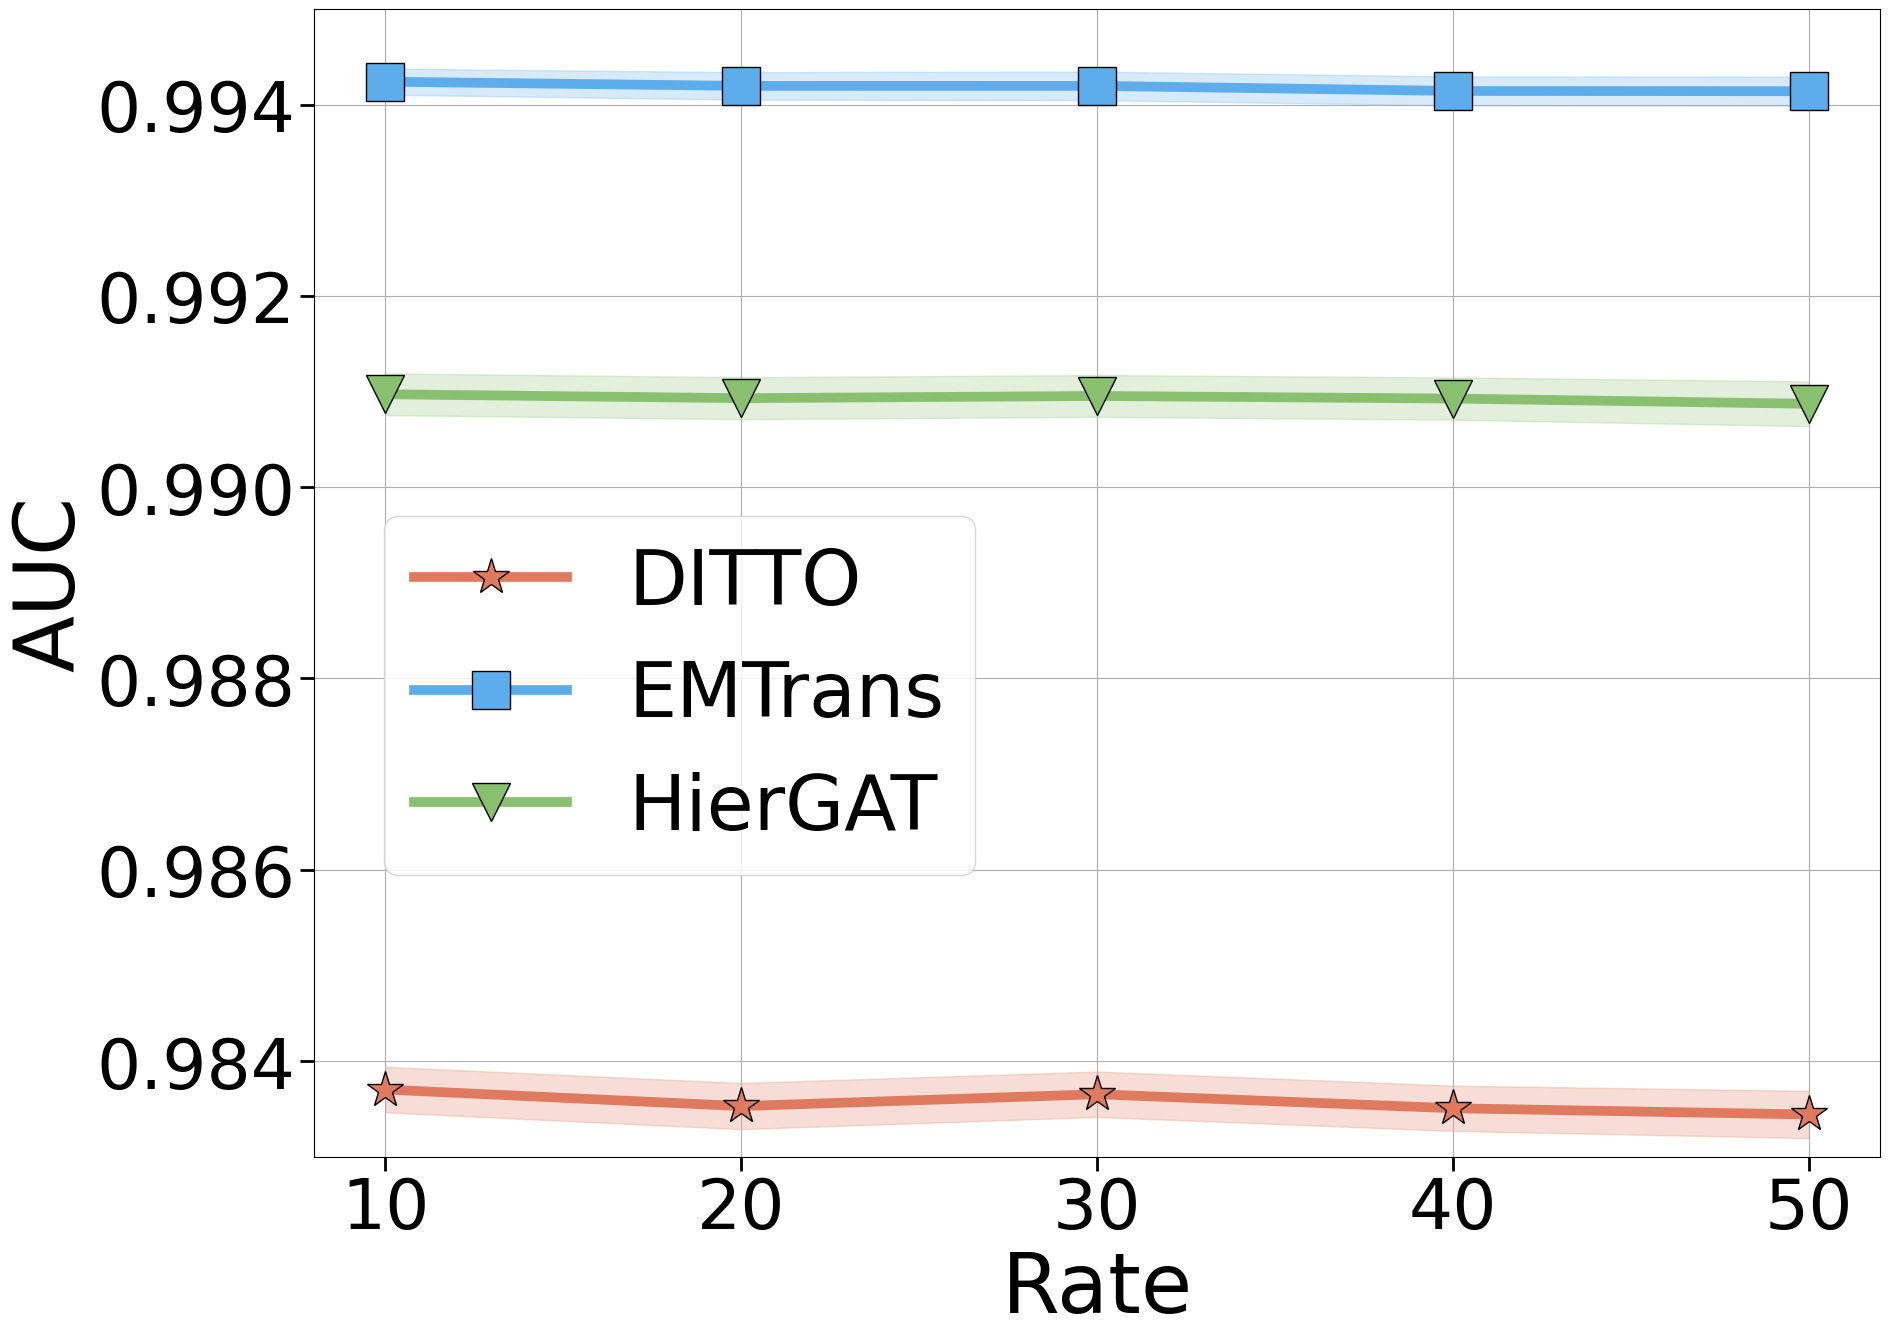

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from matplotlib.ticker import FuncFormatter


MEAN = 10000
MAXX = -1
# for task in ['_WDC', '_abt_buy','_company']:
for task in ['_WDC']:
    


    # Configuration for plot
    plt.figure(figsize=(19, 13.5))
    plt.xlabel('Rate', fontsize=60)
    plt.ylabel('AUC', fontsize=60)
    plt.yticks(fontsize=50)
    plt.xticks([0.1, .2, .3, .40, .50, ], [10, 20, 30, 40, 50], fontsize=50)

    # List of model names
    model_names_base = ['Hiermatcher', 'DeepMatcher', 'DITTO', 'EMTransformer', 'HierGAT']
    model_names_base = [ 'DeepMatcher', 'DITTO', 'EMTransformer', 'HierGAT']
    model_names_base = [ 'DITTO', 'EMTransformer', 'HierGAT']
    # model_names_base = [ 'HierGAT']
    model_names = [] 
    for row in model_names_base:
        model_names.append(row + task)

    # Mapping model names to abbreviations
    name_to_abbreviation = {
        # 'Hiermatcher': 'HM',
        'DeepMatcher': 'DM',
        'DITTO': 'DITTO',
        'EMTransformer': 'EM',
        'HierGAT': 'HG'
    }

    # Dictionary for colors and markers
    style_dict = {
        # 'Hiermatcher': {'color': '#377eb8', 'marker': '^'},
        'DeepMatcher': {'color': '#F4D35E', 'marker': 'o'},
        'DITTO': {'color': '#E07A5F', 'marker': '*'},
        'EMTransformer': {'color': '#5DADEC', 'marker': 's'},
        'HierGAT': {'color': '#88C070', 'marker': 'v'}
    }



# Green: #88C070
# Red: #E07A5F
# Blue: #5DADEC
# Yellow: #F4D35E
    # Fracture rates and folds
    # frac_values = [f"{int(frac*100):02d}" for frac in np.arange(0, 1.1, 0.1)]
    frac_values = [f"{int(frac*100):02d}" for frac in np.arange(0, 1.1, 0.1)]
    frac_values = frac_values[1:-5]
    folds = range(1, 6)
    # folds = range(1, 3)

    for name in model_names:
        if name == 'Hiermatcher_company': continue
        AUC = []

        for frac in frac_values:
            auc_list = []
            
            for fold in folds:
                # for rep in range(1, 11):
                for rep in range(1, 11):
                    tmp = name_to_abbreviation.get(name.replace(task,''), name.replace(task,''))
                    file_path = f'/Users/mohammad/Desktop/EM_Heterogeneity/out_score/{name}/{tmp}_score'+task+f'__{fold}_{frac}_{rep}.csv'
                    
                    try:
                        df = pd.read_csv(file_path)
                    except FileNotFoundError:
                        continue
                    
                    y_true, y_score = df.iloc[:, 1], df.iloc[:, 0]
                    if name in ['HierGAT_WDC','HierGAT_company']:
                        y_true, y_score = df.iloc[:, 0], df.iloc[:, 1]

                    auc_ = roc_auc_score(y_true, y_score)
                    auc_list.append(auc_)

            AUC.append(auc_list)

        
        
        AUC = np.array(AUC)
        mean_auc = np.mean(AUC, axis=1)
        # print(np.max(mean_auc), np.min(mean_auc))
        MEAN = min(np.min(mean_auc), MEAN)
        MAXX = max(np.max(mean_auc), MAXX)

        # Plot with error bars
        frac_float = [x / 100 for x in range(0, 101, 10)]
        frac_float = [x / 100 for x in range(10, 51, 10)]

        # plt.errorbar(frac_float, mean_auc, yerr=(np.var(AUC, axis=1)), fmt='-', 
        #             color=style_dict[name.replace(task,'')]['color'], marker=style_dict[name.replace(task,'')]['marker'], 
        #             markerfacecolor=style_dict[name.replace(task,'')]['color'], markeredgecolor=style_dict[name.replace(task,'')]['color'], 
        #             markersize=35, capsize=12, elinewidth=6, linewidth=8, 
        #             label=name_to_abbreviation[name.replace(task,'')].replace('HG','HierGAT').replace('EM','EMTrans').replace('DM','DeepMatch'))

            
        plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
                 markeredgecolor='black',
                    markersize=27, linewidth=7, 
                    label=name_to_abbreviation[name.replace(task,'')].replace('HG','HierGAT').replace('EM','EMTrans').replace('DM','DeepMatch'))
        
                #  markeredgecolor=style_dict[name.replace(task,'')]['color'])
        # plt.fill_between(frac_float, 
        #                 mean_auc - np.sqrt(np.var(AUC, axis=1)),
        #                 mean_auc + np.sqrt(np.var(AUC, axis=1)),
        #                 color='b', alpha=0.2,
        #                 label='±1 Standard Deviation')
        from scipy import stats
        # Calculate confidence interval
        confidence_interval = 0.55
        z_score = stats.norm.ppf((1 + confidence_interval) / 2)
        margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / (len(folds)))

        # Plot confidence intervals
        plt.fill_between(frac_float,
                        mean_auc - margin_of_error,
                        mean_auc + margin_of_error,
                        alpha=0.25,color=style_dict[name.replace(task,'')]['color'])
                        # label=f'{confidence_interval*100}% Confidence Interval')

    
    # Formatter function for y-axis
    def format_y(value, tick_number): return f'{value:.3f}'
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
    # plt.legend(fontsize=40, ncol=2)
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
    plt.tick_params(axis='both', which='major', length=10, width=2)
    plt.tick_params(axis='both', which='minor', length=5, width=1)
    # plt.ylim([MEAN-1, 100])
    if 'buy' in task:
        plt.legend(fontsize=55,loc='lower left', bbox_to_anchor=(-.02, -0.02))
    plt.legend(fontsize=55,loc='center left', bbox_to_anchor=(0.02, 0.402))
# plt.legend(fontsize=55)

    plt.ylim([0.983, 0.995])
    # plt.legend(fontsize=55)

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=35)
    # plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
    plt.grid()    
    plt.tight_layout()


    plt.savefig(task.strip('_')+'_Synonym_zoom'+'.pdf')
    # # Show the plot
    # plt.close()


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_5361/2069203820.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],


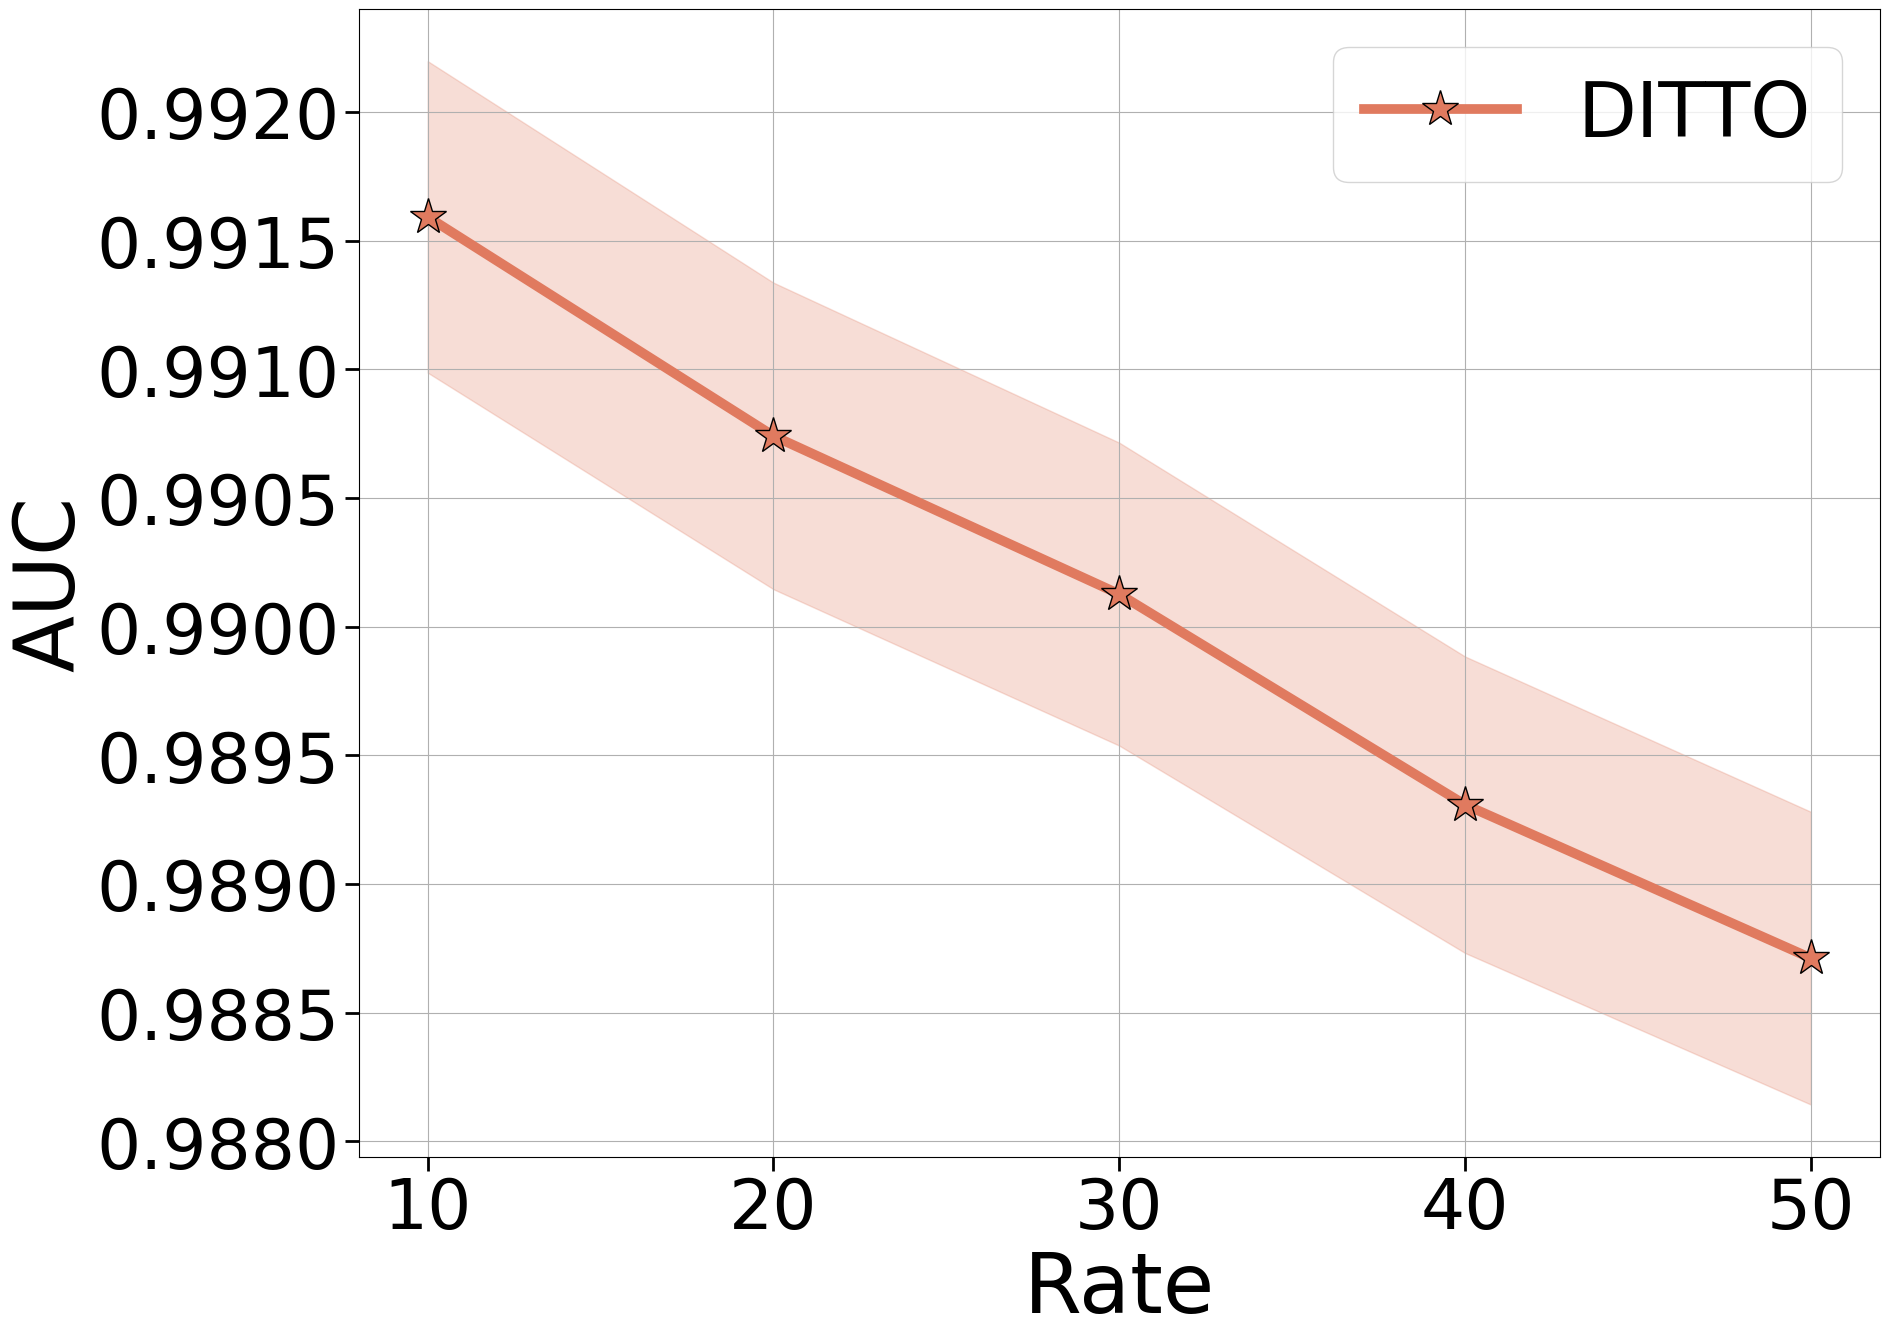

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from matplotlib.ticker import FuncFormatter


MEAN = 10000
MAXX = -1
# for task in ['_WDC', '_abt_buy','_company']:
for task in ['_company']:
    


    # Configuration for plot
    plt.figure(figsize=(19, 13.5))
    plt.xlabel('Rate', fontsize=60)
    plt.ylabel('AUC', fontsize=60)
    plt.yticks(fontsize=50)
    plt.xticks([0.1, .2, .3, .40, .50, ], [10, 20, 30, 40, 50], fontsize=50)

    # List of model names
    model_names_base = ['Hiermatcher', 'DeepMatcher', 'DITTO', 'EMTransformer', 'HierGAT']
    model_names_base = [ 'DeepMatcher', 'DITTO', 'EMTransformer', 'HierGAT']
    model_names_base = [ 'DITTO']
    model_names = [] 
    for row in model_names_base:
        model_names.append(row + task)

    # Mapping model names to abbreviations
    name_to_abbreviation = {
        # 'Hiermatcher': 'HM',
        'DeepMatcher': 'DM',
        'DITTO': 'DITTO',
        'EMTransformer': 'EM',
        'HierGAT': 'HG'
    }

    # Dictionary for colors and markers
    style_dict = {
        # 'Hiermatcher': {'color': '#377eb8', 'marker': '^'},
        'DeepMatcher': {'color': '#F4D35E', 'marker': 'o'},
        'DITTO': {'color': '#E07A5F', 'marker': '*'},
        'EMTransformer': {'color': '#5DADEC', 'marker': 's'},
        'HierGAT': {'color': '#88C070', 'marker': 'v'}
    }



# Green: #88C070
# Red: #E07A5F
# Blue: #5DADEC
# Yellow: #F4D35E
    # Fracture rates and folds
    # frac_values = [f"{int(frac*100):02d}" for frac in np.arange(0, 1.1, 0.1)]
    frac_values = [f"{int(frac*100):02d}" for frac in np.arange(0, 1.1, 0.1)]
    frac_values = frac_values[1:-5]
    folds = range(1, 6)
    # folds = range(1, 3)

    for name in model_names:
        if name == 'Hiermatcher_company': continue
        AUC = []

        for frac in frac_values:
            auc_list = []
            
            for fold in folds:
                # for rep in range(1, 11):
                for rep in range(1, 11):
                    tmp = name_to_abbreviation.get(name.replace(task,''), name.replace(task,''))
                    file_path = f'/Users/mohammad/Desktop/EM_Heterogeneity/out_score/{name}/{tmp}_score'+task+f'__{fold}_{frac}_{rep}.csv'
                    
                    try:
                        df = pd.read_csv(file_path)
                    except FileNotFoundError:
                        continue
                    
                    y_true, y_score = df.iloc[:, 1], df.iloc[:, 0]
                    if name in ['HierGAT_WDC','HierGAT_company']:
                        y_true, y_score = df.iloc[:, 0], df.iloc[:, 1]

                    auc_ = roc_auc_score(y_true, y_score)
                    auc_list.append(auc_)

            AUC.append(auc_list)

        
        
        AUC = np.array(AUC)
        mean_auc = np.mean(AUC, axis=1)
        # print(np.max(mean_auc), np.min(mean_auc))
        MEAN = min(np.min(mean_auc), MEAN)
        MAXX = max(np.max(mean_auc), MAXX)

        # Plot with error bars
        frac_float = [x / 100 for x in range(0, 101, 10)]
        frac_float = [x / 100 for x in range(10, 51, 10)]

        # plt.errorbar(frac_float, mean_auc, yerr=(np.var(AUC, axis=1)), fmt='-', 
        #             color=style_dict[name.replace(task,'')]['color'], marker=style_dict[name.replace(task,'')]['marker'], 
        #             markerfacecolor=style_dict[name.replace(task,'')]['color'], markeredgecolor=style_dict[name.replace(task,'')]['color'], 
        #             markersize=35, capsize=12, elinewidth=6, linewidth=8, 
        #             label=name_to_abbreviation[name.replace(task,'')].replace('HG','HierGAT').replace('EM','EMTrans').replace('DM','DeepMatch'))

            
        plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
                 markeredgecolor='black',
                    markersize=27, linewidth=7, 
                    label=name_to_abbreviation[name.replace(task,'')].replace('HG','HierGAT').replace('EM','EMTrans').replace('DM','DeepMatch'))
        
                #  markeredgecolor=style_dict[name.replace(task,'')]['color'])
        # plt.fill_between(frac_float, 
        #                 mean_auc - np.sqrt(np.var(AUC, axis=1)),
        #                 mean_auc + np.sqrt(np.var(AUC, axis=1)),
        #                 color='b', alpha=0.2,
        #                 label='±1 Standard Deviation')
        from scipy import stats
        # Calculate confidence interval
        confidence_interval = 0.5
        z_score = stats.norm.ppf((1 + confidence_interval) / 2)
        margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / (len(folds)))

        # Plot confidence intervals
        plt.fill_between(frac_float,
                        mean_auc - margin_of_error,
                        mean_auc + margin_of_error,
                        alpha=0.25,color=style_dict[name.replace(task,'')]['color'])
                        # label=f'{confidence_interval*100}% Confidence Interval')

    
    # Formatter function for y-axis
    def format_y(value, tick_number): return f'{value:.4f}'
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
    # plt.legend(fontsize=40, ncol=2)
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
    plt.tick_params(axis='both', which='major', length=10, width=2)
    plt.tick_params(axis='both', which='minor', length=5, width=1)
    # plt.ylim([MEAN-1, 100])
    if 'buy' in task:
        plt.legend(fontsize=55)
        # plt.ylim([MEAN-1.5, 100])
    plt.legend(fontsize=55)

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=35)
    # plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
    plt.grid()    
    plt.tight_layout()


    # plt.savefig(task.strip('_')+'_Synonym_ditto'+'.pdf')
    # # Show the plot
    # plt.close()
